In [1]:
%pip install numpy pandas matplotlib seaborn


  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
Using cached pandas-2.0.3-cp38-

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv("Zomato-data-.csv", encoding='latin-1')
print(dataframe.shape)
print(dataframe.head())

(148, 7)
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
#step 3 data cleaning and preparation

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return value
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table rate  votes  \
0                  Jalsa          Yes        Yes  4.1    775   
1         Spice Elephant          Yes         No  4.1    787   
2        San Churro Cafe          Yes         No  3.8    918   
3  Addhuri Udupi Bhojana           No         No  3.7     88   
4          Grand Village           No         No  3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

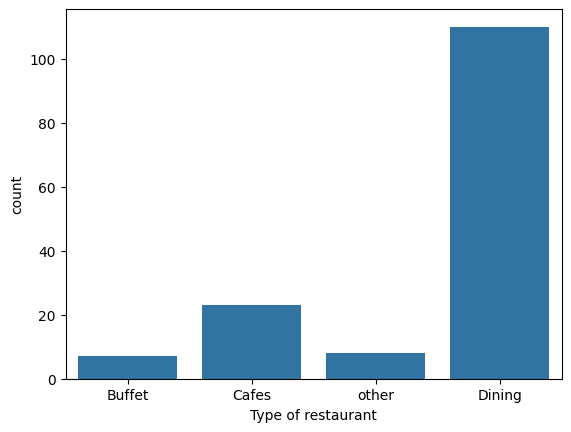

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

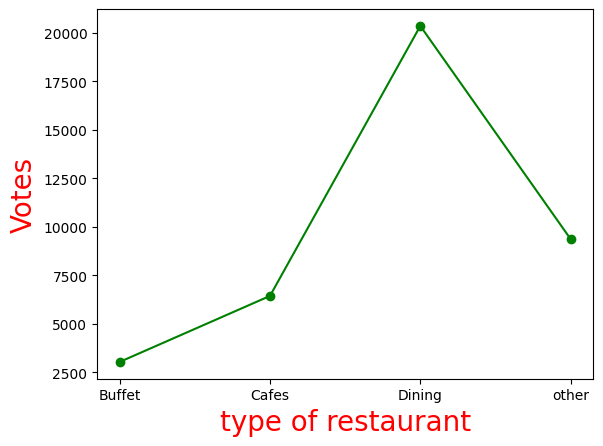

In [12]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel("type of restaurant", c='red', size=20)
plt.ylabel("Votes", c='red', size=20)

In [13]:
max_votes=dataframe['votes'].max()
restaurant_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print('Restaurant with maximum votes:')
print(restaurant_with_max_votes)

Restaurant with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

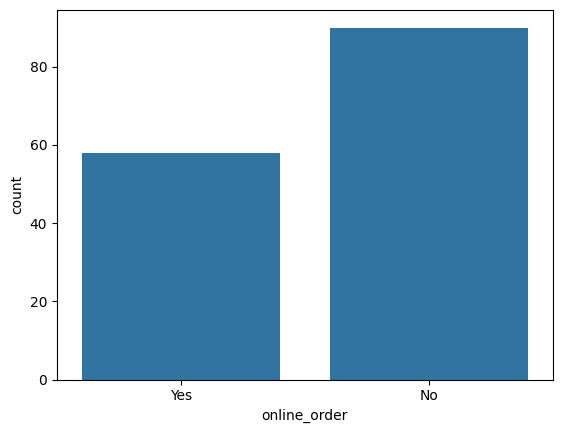

In [14]:
sns.countplot (x=dataframe['online_order'])


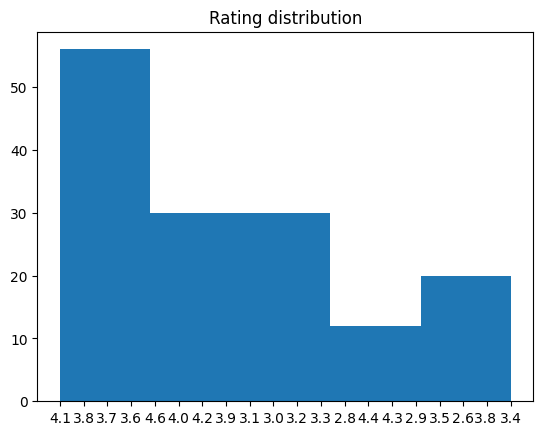

In [15]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Rating distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

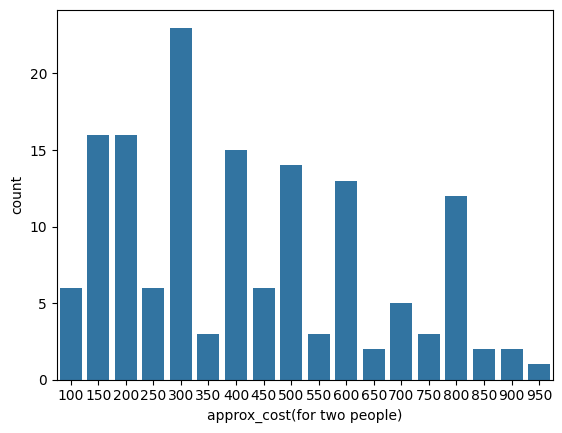

In [16]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

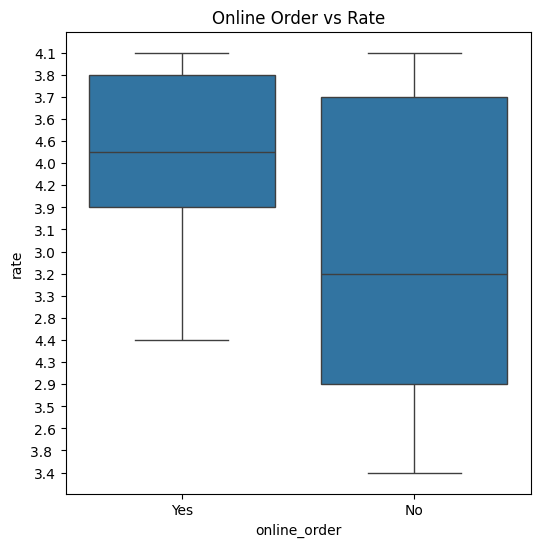

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)
plt.title('Online Order vs Rate')   
plt.show()

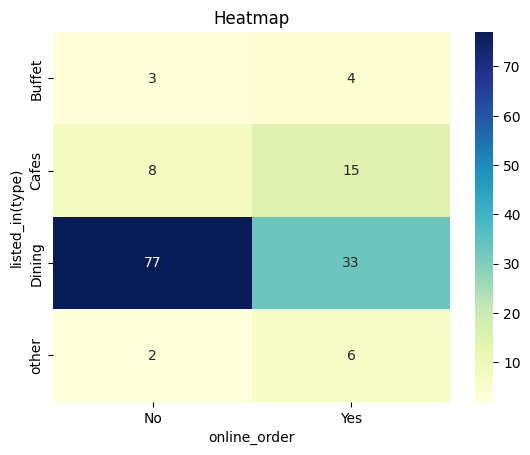

In [19]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d',cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel("listed_in(type)")
plt.show()